In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Check PCs

In [2]:
pcs_fname = 'data/components.csv'

pcs = pd.read_csv(pcs_fname)

In [12]:
x = [float(item) for item in pcs.keys()]

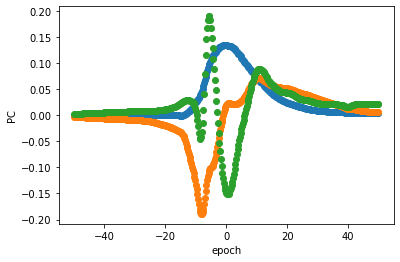

In [15]:
plt.figure()
for i in range(3):
    plt.scatter(x, pcs.iloc[i].values)
    
plt.xlabel('epoch')
plt.ylabel('PC')
plt.show()

# Check feature space

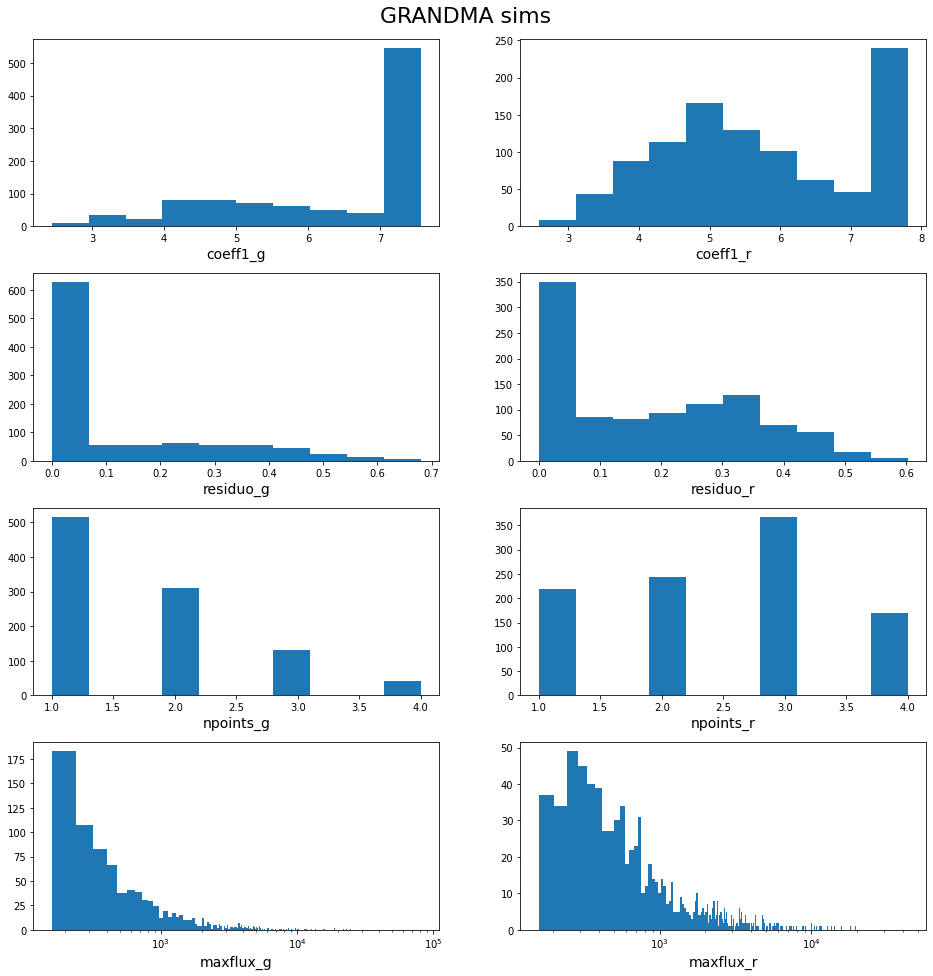

In [60]:
grandma_fname = 'data/features_GRANDMA_1PC.csv'

grandma_features = pd.read_csv(grandma_fname)

data = grandma_features

plt.figure(figsize=(16,15))
plt.suptitle('GRANDMA sims', fontsize=22)

plt.subplot(4,2,1)
plt.hist(data['coeff1_g'])
plt.xlabel('coeff1_g', fontsize=14)

plt.subplot(4,2,2)
plt.hist(data['coeff1_r'])
plt.xlabel('coeff1_r', fontsize=14)

plt.subplot(4,2,3)
plt.hist(data['residuo_g'])
plt.xlabel('residuo_g', fontsize=14)

plt.subplot(4,2,4)
plt.hist(data['residuo_r'])
plt.xlabel('residuo_r', fontsize=14)

plt.subplot(4,2,5)
plt.hist(data['npoints_g'])
plt.xlabel('npoints_g', fontsize=14)

plt.subplot(4,2,6)
plt.hist(data['npoints_r'])
plt.xlabel('npoints_r', fontsize=14)

ax7 = plt.subplot(4,2,7)
plt.hist(data['maxflux_g'], bins=1000)
plt.xlabel('maxflux_g', fontsize=14)
ax7.set_xscale('log')

ax8 = plt.subplot(4,2,8)
plt.hist(data['maxflux_r'], bins=1000)
plt.xlabel('maxflux_r', fontsize=14)
ax8.set_xscale('log')

plt.subplots_adjust(top=0.95, hspace=0.25)
plt.show()

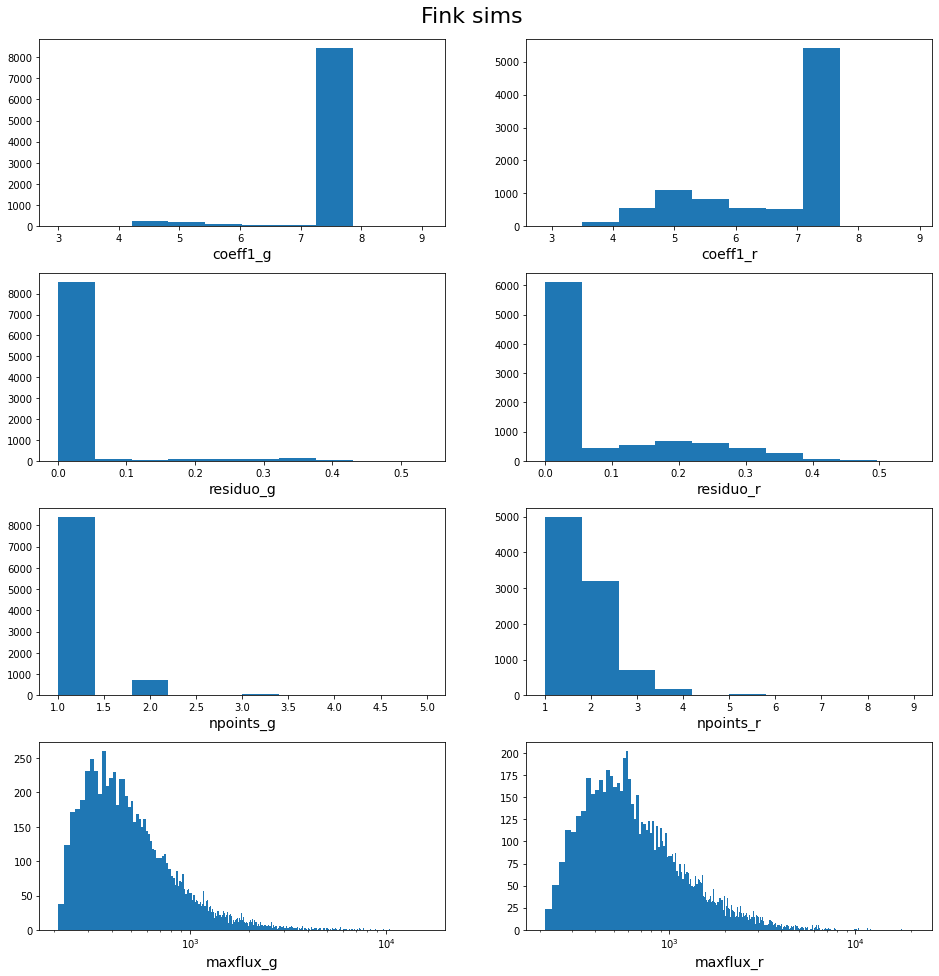

In [64]:
fink_fname = 'data/features_Fink_1PC.csv.gz'

fink_features = pd.read_csv(fink_fname)

kn_flag = np.logical_or(fink_features['type'].values == 50, 
                        fink_features['type'].values == 51)

data = fink_features[kn_flag]

plt.figure(figsize=(16,15))
plt.suptitle('Fink sims', fontsize=22)

plt.subplot(4,2,1)
plt.hist(data['coeff1_g'])
plt.xlabel('coeff1_g', fontsize=14)

plt.subplot(4,2,2)
plt.hist(data['coeff1_r'])
plt.xlabel('coeff1_r', fontsize=14)

plt.subplot(4,2,3)
plt.hist(data['residuo_g'])
plt.xlabel('residuo_g', fontsize=14)

plt.subplot(4,2,4)
plt.hist(data['residuo_r'])
plt.xlabel('residuo_r', fontsize=14)

plt.subplot(4,2,5)
plt.hist(data['npoints_g'])
plt.xlabel('npoints_g', fontsize=14)

plt.subplot(4,2,6)
plt.hist(data['npoints_r'])
plt.xlabel('npoints_r', fontsize=14)

ax7 = plt.subplot(4,2,7)
plt.hist(data['maxflux_g'], bins=1000)
plt.xlabel('maxflux_g', fontsize=14)
ax7.set_xscale('log')

ax8 = plt.subplot(4,2,8)
plt.hist(data['maxflux_r'], bins=1000)
plt.xlabel('maxflux_r', fontsize=14)
ax8.set_xscale('log')

plt.subplots_adjust(top=0.95, hspace=0.25)
plt.show()

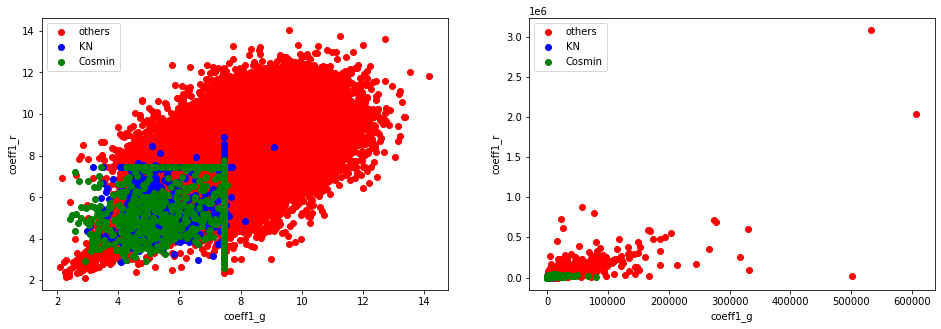

In [76]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.scatter(fink_features[~kn_flag]['coeff1_g'].values, 
            fink_features[~kn_flag]['coeff1_r'].values, label='others', color='red')
plt.scatter(fink_features[kn_flag]['coeff1_g'].values, 
            fink_features[kn_flag]['coeff1_r'].values, label='KN', color='blue')
plt.scatter(grandma_features['coeff1_g'], grandma_features['coeff1_r'], color='green',
           label='Cosmin')
plt.xlabel('coeff1_g')
plt.ylabel('coeff1_r')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(fink_features[~kn_flag]['maxflux_g'].values, 
            fink_features[~kn_flag]['maxflux_r'].values, label='others', color='red')
plt.scatter(fink_features[kn_flag]['maxflux_g'].values, 
            fink_features[kn_flag]['maxflux_r'].values, label='KN', color='blue')
plt.scatter(grandma_features['maxflux_g'], grandma_features['maxflux_r'], color='green',
           label='Cosmin')
plt.xlabel('coeff1_g')
plt.ylabel('coeff1_r')
plt.legend()


plt.show()

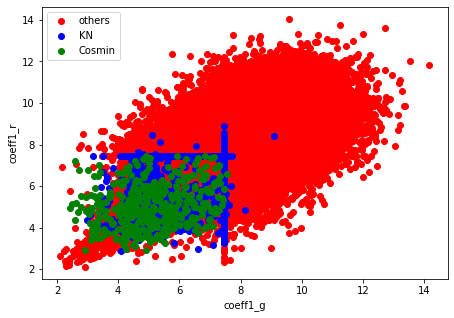

In [75]:
fink_zeros = np.logical_and(fink_features['residuo_r'].values == 0,
                           fink_features['residuo_g'].values == 0)

fink_others = np.logical_and(~fink_zeros, ~kn_flag)
fink_kn = np.logical_and(~fink_zeros, kn_flag)
grandma_clean = np.logical_and(grandma_features['residuo_g'].values != 0,
                              grandma_features['residuo_r'].values != 0)


plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.scatter(fink_features[fink_others]['coeff1_g'].values, 
            fink_features[fink_others]['coeff1_r'].values, label='others', color='red')
plt.scatter(fink_features[fink_kn]['coeff1_g'].values, 
            fink_features[fink_kn]['coeff1_r'].values, label='KN', color='blue')
plt.scatter(grandma_features[grandma_clean]['coeff1_g'], 
            grandma_features[grandma_clean]['coeff1_r'], color='green',
           label='Cosmin')
plt.xlabel('coeff1_g')
plt.ylabel('coeff1_r')
plt.legend()

plt.show()

# test saved model

In [135]:
import pickle
import pandas as pd
import numpy as np

model_fname = 'models/KN_model_1PC.pkl'
train_fname = 'data/training_1PC.csv.gz'
test_fname = 'data/test_1PC.csv.gz'
fname1 = 'data/features_Fink_1PC.csv.gz'
fname2 = 'data/features_GRANDMA_1PC.csv'

data1 = pd.read_csv(fname1)
data2 = pd.read_csv(fname2)

data = pd.concat([data1, data2], ignore_index=True)

model = pickle.load(open(model_fname, 'rb'))
train_data = pd.read_csv(train_fname)
test_data = pd.read_csv(test_fname)

label_train = np.logical_or(train_data['type'] == 51, train_data['type'].values == 50)
label_test = np.logical_or(test_data['type'] == 51, test_data['type'].values == 50)
res_train = np.logical_or(train_data['residuo_g'].values == 0, 
                      train_data['residuo_r'].values == 0)
res_test = np.logical_or(test_data['residuo_g'].values == 0, 
                      test_data['residuo_r'].values == 0)

train_data['label'] = label_train

In [136]:
model.score(test_data.values[:,2:], label_test)

0.995663750475466

In [137]:
prob = model.predict_proba(test_data.values[:,2:])

In [138]:
test_data['prob_KN'] = prob[:,1]

In [139]:
np.unique(test_data[test_data['prob_KN'] >0.5]['type'].values, return_counts=True)

(array([12., 13., 14., 45., 51., 80., 81., 90.]),
 array([  1,   1,   1,  20, 382,   7,   1,  45]))

In [140]:
cc_kn = sum(np.logical_and(prob[:,1] > 0.5, label_test))
tot_kn = sum(label_test)
tot_class_kn = sum(prob[:,1] > 0.5)


print('KN in test ', sum(label_test), ' -- ', 
      round(100*sum(label_test)/float(test_data.shape[0]),3),
      '%')
print('Efficiency: ', cc_kn/float(tot_kn))
print('Purity: ', cc_kn/float(tot_class_kn))

KN in test  534  --  1.016 %
Efficiency:  0.7153558052434457
Purity:  0.834061135371179


# Check probabilities

In [141]:
flag_cosmin_test = np.array([item in data2['SNID'].values 
                             for item in test_data['SNID'].values])

flag_fink_kn_test = np.logical_and(~flag_cosmin_test, label_test)

flag_fink_Ia = test_data['type'].values == 90

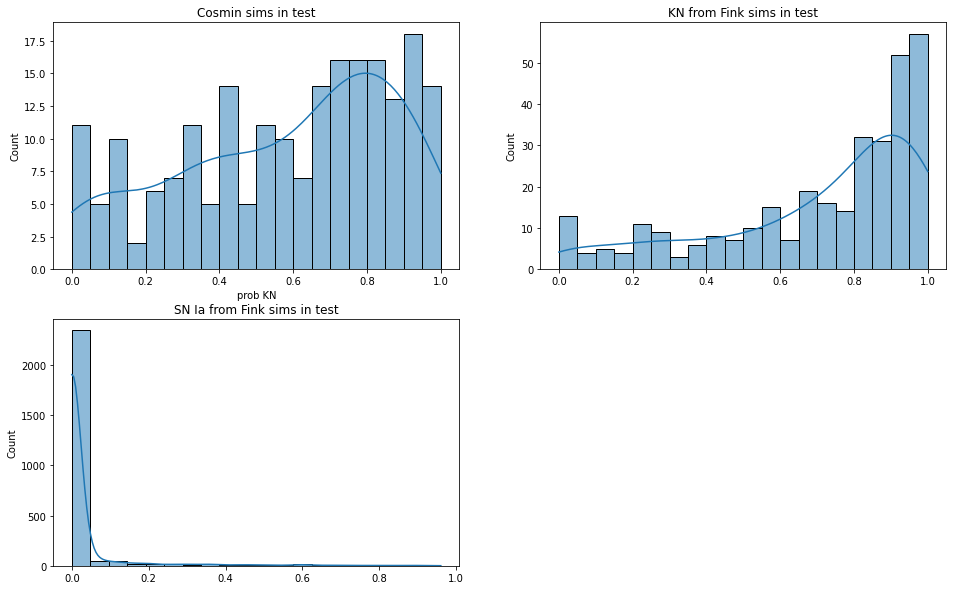

In [142]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.title('Cosmin sims in test')
sns.histplot(prob[flag_cosmin_test][:,1], bins=20, kde=True)
plt.xlabel('prob KN')

plt.subplot(2,2,2)
plt.title('KN from Fink sims in test')
sns.histplot(prob[flag_fink_kn_test][:,1], bins=20, kde=True)

plt.subplot(2,2,3)
plt.title('SN Ia from Fink sims in test')
sns.histplot(prob[flag_fink_Ia][:,1], bins=20, kde=True)
plt.show()